In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

dataframe = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv',low_memory=False)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

# 1. Comparación por marca

In [51]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str
dataframe['marca'] = dataframe['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

prod1=dataframe[dataframe['event'] == 'conversion']
conversion = prod1['marca'].value_counts()

prod2=dataframe[dataframe['event'] == 'checkout']
checkout = prod2['marca'].value_counts()

In [52]:
tabla1 = pd.concat([conversion],axis=1)
tabla1.columns = ['conversion']
tabla1['conversion_log'] = np.log(tabla1["conversion"]+1)

tabla2 = pd.concat([checkout],axis=1)
tabla2.columns = ['checkout']
tabla2['checkout_log'] = np.log(tabla2["checkout"]+1)

tabla = pd.concat([tabla2['checkout_log'],tabla1['conversion_log']],axis=1)

Text(0.5,0,'Marca')

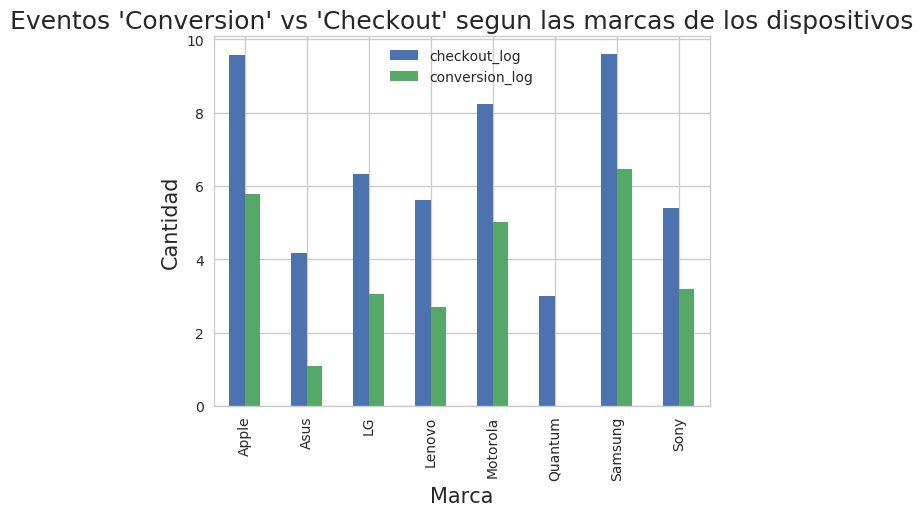

In [53]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = tabla.plot.bar()
g.set_title("Eventos 'Conversion' vs 'Checkout' segun las marcas de los dispositivos", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

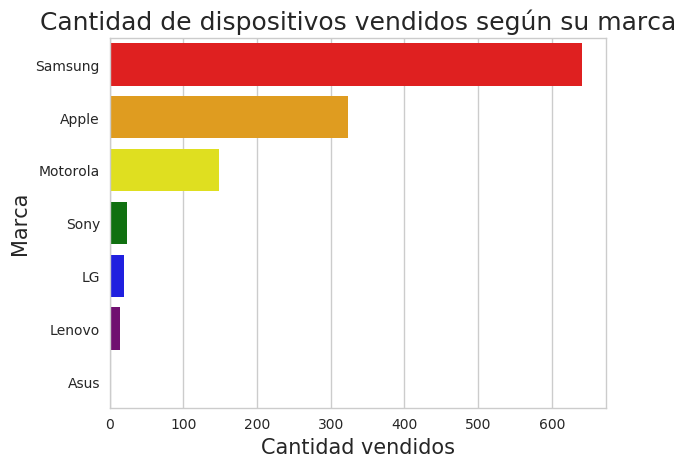

In [54]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''

g = sns.barplot(x=conversion.values, y=conversion.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_xlabel("Cantidad vendidos", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0.5,0,'Modelo')

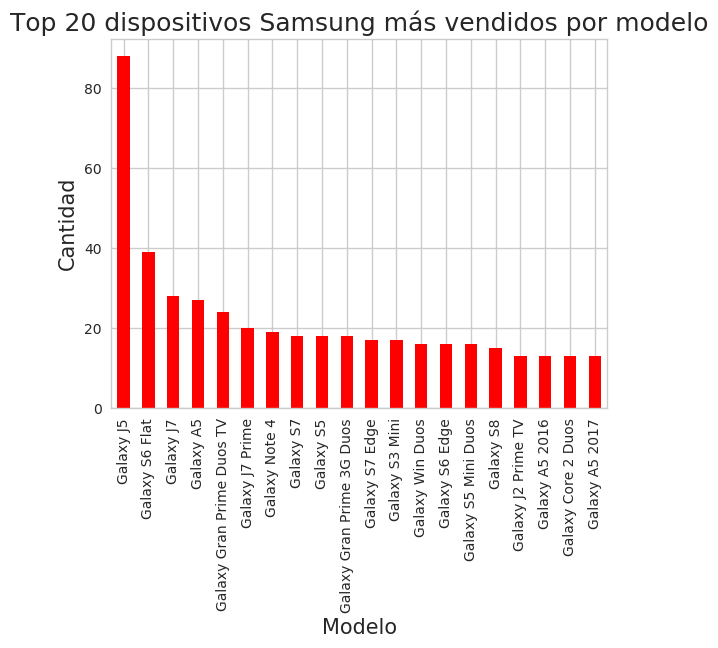

In [55]:
'''
Grafico de barras de top 20 dispositivos Samsung mas vendidos.
'''

SamsungVendidos = prod1.loc[prod1.marca == 'Samsung',:]['modelo'].value_counts().head(20)
SamsungVendidos

g = SamsungVendidos.plot.bar(color=['red'])
g.set_title("Top 20 dispositivos Samsung más vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

### Se ve que los celulares Samsung mas vendidos no son los mas nuevos, sino que son celulares que fueron lanzados al mercado hace 3 años aproximadamente. Esto demuestra que los usuarios tienen tendencias a comprar dispositivos que no estan discontinuados pero que por otro lado ya han sido sucedidos por varios modelos nuevos.

Text(0.5,0,'Modelo')

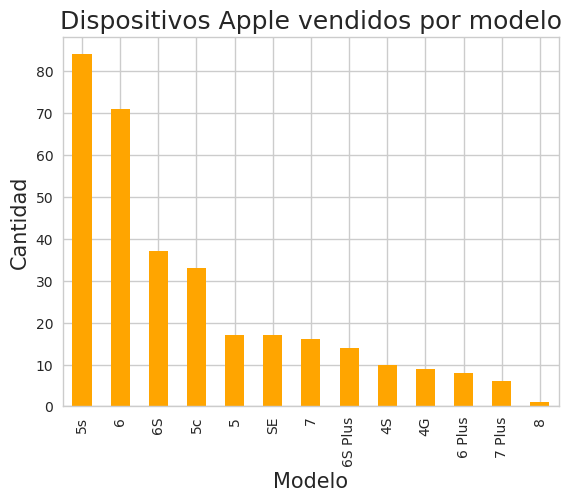

In [56]:
'''
Grafico de barras de dispositivos Apple mas vendidos.
'''

AppleVendidos = prod1.loc[prod1.marca == 'Apple',:]['modelo'].value_counts()
AppleVendidos

g = AppleVendidos.plot.bar(color=['orange'])
g.set_title("Dispositivos Apple vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

### A diferencia de Samsung, aqui se ve que los 2 modelos mas vendidos son modelos que salieron entre 4 y 5 años atras. Esto muestra algo similar a lo sucedido con Samsung, demostrando que los dispositivos de Apple mas nuevos suelen ser muy caros y por lo que la gente que recurre a la pagina esta mas interesada en celulares viejos pero que todavia estan funcionales.

Text(0.5,0,'Modelo')

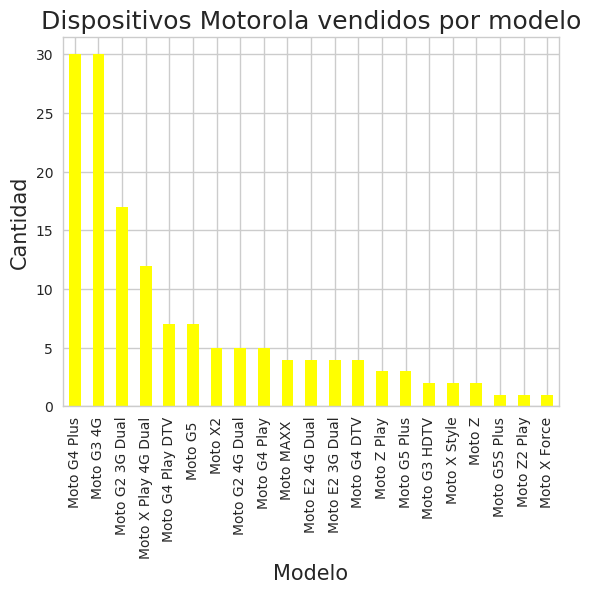

In [57]:
'''
Grafico de barras de dispositivos Motorola mas vendidos.
'''
MotorolaVendidos = prod1.loc[prod1.marca == 'Motorola',:]['modelo'].value_counts()
MotorolaVendidos

g = MotorolaVendidos.plot.bar(color=['yellow'])
g.set_title("Dispositivos Motorola vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

In [81]:
#Registros para aviso de stock por marca y modelo
leads=dataframe.groupby('event')
leads=leads.get_group('lead').groupby(['marca','model'])['event'].count().to_frame()

leads['cantidad de leads']=leads['event']
leads['cantidad de leads'].to_frame()

cantidad de leads
marca      model                                                 
Apple      iPad Air Wi-Fi + 4G                                  2
           iPad Mini Wi-Fi + 4G                                 1
           iPhone 4G                                            3
           iPhone 4S                                            2
           iPhone 5                                             3
           iPhone 5c                                            4
           iPhone 5s                                            5
           iPhone 6                                            12
           iPhone 6 Plus                                       35
           iPhone 6S                                           21
           iPhone 6S Plus                                      31
           iPhone 7                                             5
           iPhone 7 Plus                                        9
           iPhone 8                                            20
           iPhone 8 Plus                                        7
           iPhone SE                                            5
           iPhone X                                             4
Asus       Asus Zenfone 3 Max 16 GB                             3
Blackberry Blackberry Blackberry Z30                            1
LG         LG  X Screen                                         1
           LG G3 Stylus D690                                    1
           LG G4 H815P                                          1
           LG G4 H818P                                          2
           LG G4 Stylus H630                                    3
           LG G5 SE                                             2
           LG K10                                               4
           LG K10 Novo                                         12
           LG K10 TV                                            6
           LG K4                                                5
           LG Prime Plus H522                                   2
...                                                           ...
Samsung    Samsung Galaxy J2 4G Duos TV                         2
           Samsung Galaxy J2 Prime TV                           2
           Samsung Galaxy J3                                    1
           Samsung Galaxy J5                                    2
           Samsung Galaxy J5 2016 Metal                         1
           Samsung Galaxy J5 PRO                                3
           Samsung Galaxy J5 Prime                              4
           Samsung Galaxy J7                                    2
           Samsung Galaxy J7 2016 Metal                         1
           Samsung Galaxy J7 PRO                                8
           Samsung Galaxy J7 Prime                             26
           Samsung Galaxy Note 4                                1
           Samsung Galaxy Note 5                                5
           Samsung Galaxy Note 8                                2
           Samsung Galaxy Note Edge                             1
           Samsung Galaxy On 7                                 15
           Samsung Galaxy S3 Mini                               1
           Samsung Galaxy S3 Slim Duos                          1
           Samsung Galaxy S5 Mini Duos                          1
           Samsung Galaxy S6 Edge                               3
           Samsung Galaxy S6 Flat                               1
           Samsung Galaxy S7 Edge                               4
           Samsung Galaxy S8                                    2
           Samsung Galaxy S8 Plus                               2
           Samsung Galaxy Tab E 9.6 Wi-Fi                       2
           Samsung Galaxy Tab E 9.6 Wi-Fi + 3G                  1
           Samsung Galaxy Win 2 Duos TV                         1
           Samsung Galaxy Y Duos                                2
Sony       Sony Xperia

In [82]:
#Mayores cantidades de registro de aviso de disponibilidad de stock por marca
max_leads=leads.groupby('marca').agg({'cantidad de leads':'max'})
max_leads

,cantidad de leads
marca,
Apple,35
Asus,3
Blackberry,1
LG,12
Lenovo,7
Motorola,20
Quantum,3
Samsung,26
Sony,1


In [85]:
#Modelo Apple con mas leads
leads
leads = leads.reset_index()
leads.loc[(leads['marca']=='Apple')&(leads['cantidad de leads']==35),:]

,marca,model,event,cantidad de leads
8,Apple,iPhone 6 Plus,35,35


In [86]:
#Modelo Samsung con mas leads
leads.loc[(leads['marca']=='Samsung')&(leads['cantidad de leads']==26),:]

,marca,model,event,cantidad de leads
75,Samsung,Samsung Galaxy J7 Prime,26,26


In [117]:
#Modelo Motorola con mas leads
leads.loc[(leads['marca']=='Motorola')&(leads['cantidad de leads']==20),:]

,marca,model,event,cantidad de leads
38,Motorola,Motorola Moto G4 Plus,20,20


# 2. Comparación por fecha

In [87]:
'''
Agrego las columnas año, mes y dia.
'''
dataframe['año'],dataframe['mes'],dataframe['dia']= dataframe['timestamp'].str.split(' ').str[0].str.split('-').str

In [88]:
dataframe['actividad'] = 1
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='actividad', aggfunc='sum')

Text(50.7222,0.5,'Mes')

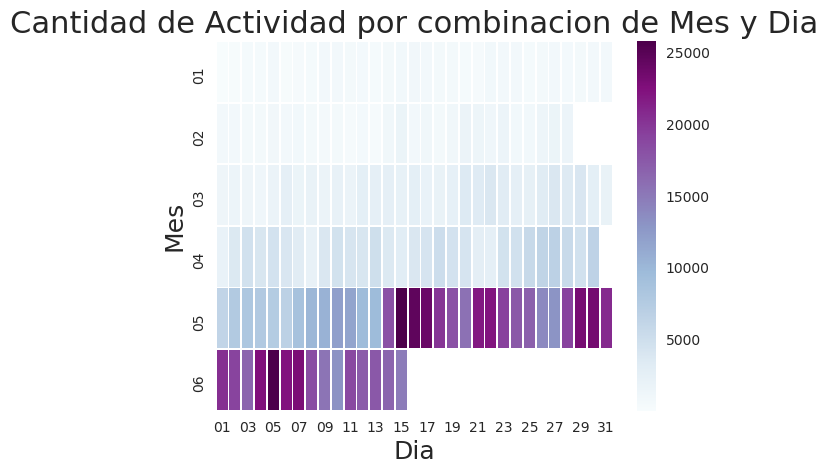

In [89]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de Actividad por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [90]:
dataframe['compra'] = dataframe['event']=='conversion'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='compra', aggfunc='sum')

Text(50.7222,0.5,'Mes')

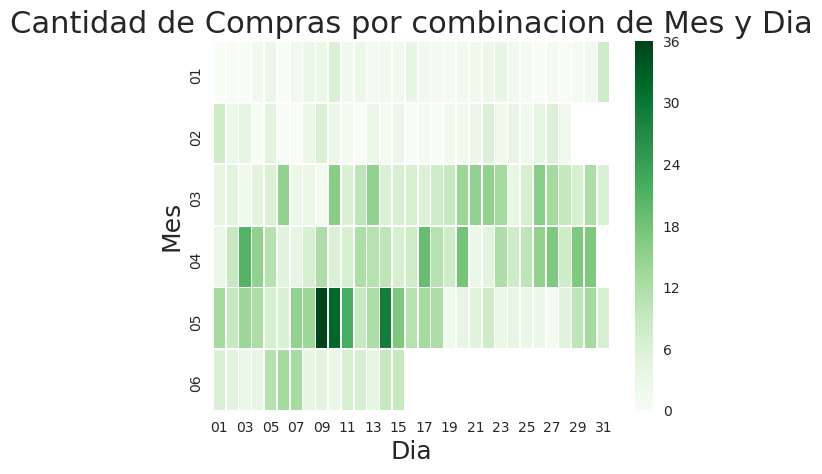

In [91]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Greens") # annot=True
g.set_title("Cantidad de Compras por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [92]:
dataframe['checkout'] = dataframe['event']=='checkout'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='checkout', aggfunc='sum')

Text(50.7222,0.5,'Mes')

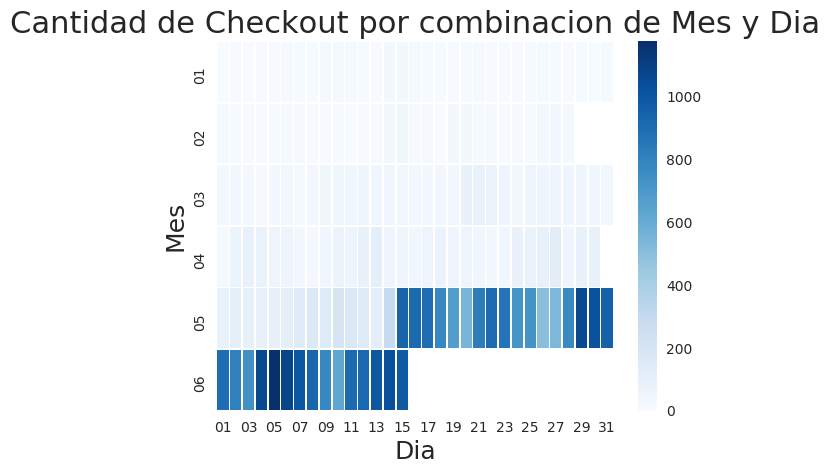

In [93]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Blues") # annot=True
g.set_title("Cantidad de Checkout por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

# 3. Comparación por ubicación

In [94]:
dataframe['pais'] = dataframe['country'].dropna().apply(lambda country: 'Other' if (country != 'Brazil') else country)

In [95]:
ingresoPorPais = dataframe.loc[dataframe['event'] == 'visited site'].filter(items = ['pais','event']).groupby('pais').count()
ingresoPorPais = ingresoPorPais.loc[ingresoPorPais['event'] > 10]['event']

Text(0,0.5,'')

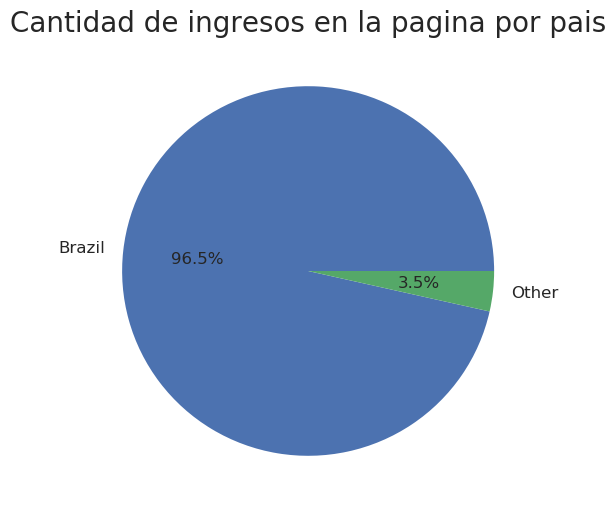

In [96]:
'''
Grafico pie de eventos en la pagina por pais.
'''
g = ingresoPorPais.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),fontsize=12)
g.set_title("Cantidad de ingresos en la pagina por pais",fontsize=20)
g.set_ylabel("")

### Se ve que supera por gran distancia Brasil en cuanto a lo que es visitar la pagina, por lo que se entiende que tiene una gran repercusion local.

In [97]:
dataframe.loc[dataframe['country']!='Brazil',:]['country'].value_counts()

Unknown               2313
United States          465
Argentina               94
Canada                  35
France                  13
Netherlands             13
United Kingdom          12
Mozambique              12
Japan                   11
Poland                   9
French Guiana            8
Portugal                 7
Romania                  7
Italy                    7
Guadeloupe               6
Dominican Republic       6
Russia                   6
Germany                  5
Colombia                 4
Bangladesh               4
Paraguay                 4
Switzerland              3
Morocco                  2
India                    2
Angola                   2
Peru                     1
Ireland                  1
Spain                    1
South Africa             1
China                    1
Belize                   1
Sri Lanka                1
Cape Verde               1
Israel                   1
Denmark                  1
Uzbekistan               1
Turkey                   1
V

Sao Paulo              24996
Unknown                12378
Minas Gerais            7755
Rio de Janeiro          6913
Bahia                   5737
Pernambuco              2962
Ceara                   2829
Parana                  2602
Rio Grande do Sul       2576
Federal District        1739
Goias                   1564
Santa Catarina          1511
Para                    1382
Maranhao                1303
Espirito Santo          1257
Rio Grande do Norte     1064
Paraíba                  875
Piaui                    824
Alagoas                  751
Mato Grosso do Sul       618
Amazonas                 600
Tocantins                596
Mato Grosso              487
Sergipe                  405
Rondonia                 273
Amapa                    148
Acre                      96
Roraima                   67
Name: region, dtype: int64

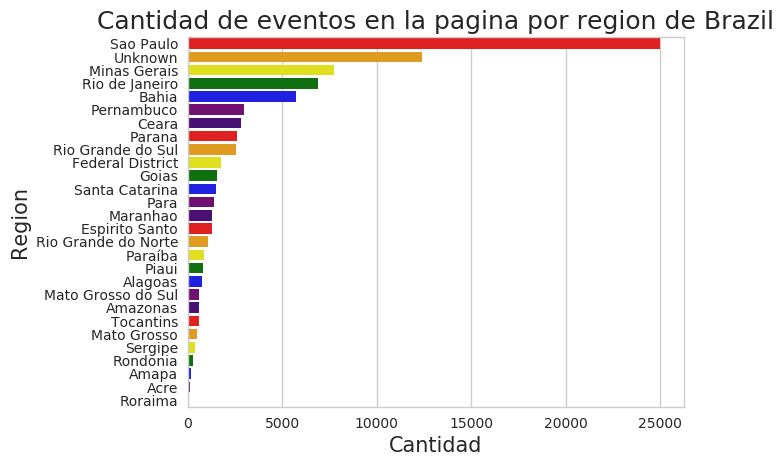

In [98]:
'''
Grafico de barras de cantidad de eventos en la pagina por region en Brazil.
'''
ingresoPorRegionEnBrazil = dataframe.filter(items = ['country','region','event']).loc[dataframe['country'] == 'Brazil']['region'].value_counts()

g = sns.barplot(x=ingresoPorRegionEnBrazil.values, y=ingresoPorRegionEnBrazil.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de eventos en la pagina por region de Brazil", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Region", fontsize=15)

ingresoPorRegionEnBrazil

# 4. Comparación por ad campaign

Text(0,0.5,'Ad')

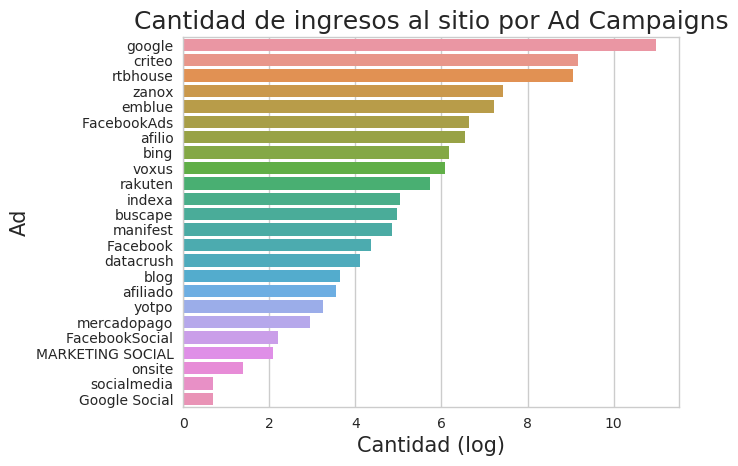

In [99]:
'''
Grafico de barras de la cantidad de ingresos al sitio por Ad Campaigns.
'''
ingresosPorAd = dataframe.loc[dataframe['event'] == 'ad campaign hit']['campaign_source'].value_counts()
ingresosPorAd_log= np.log(ingresosPorAd+1)
g = sns.barplot(x=ingresosPorAd_log.values, y=ingresosPorAd.index, orient='h')
g.set_title("Cantidad de ingresos al sitio por Ad Campaigns", fontsize=18)
g.set_xlabel("Cantidad (log)", fontsize=15)
g.set_ylabel("Ad", fontsize=15)

Text(0,0.5,'Marca')

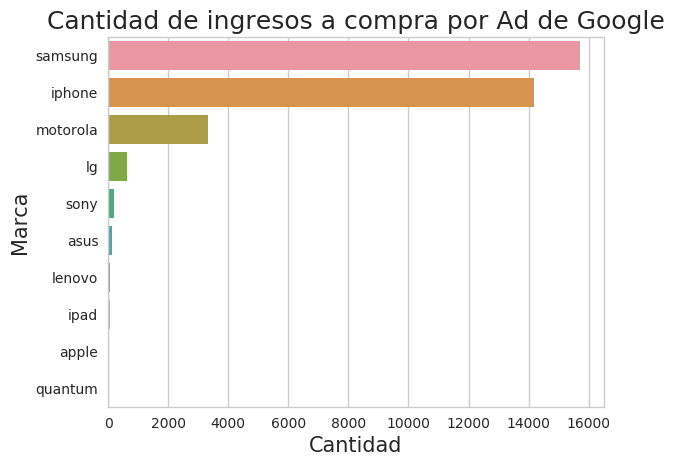

In [100]:
'''
Grafico de barras de la cantidad de ingresos a compra por Ad Campaigns de Google.
'''
ingresosCompraPorAdDeGoogle = dataframe.loc[dataframe['campaign_source'] == 'google']['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'comprar') else None).value_counts()

g = sns.barplot(x=ingresosCompraPorAdDeGoogle.values, y=ingresosCompraPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a compra por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

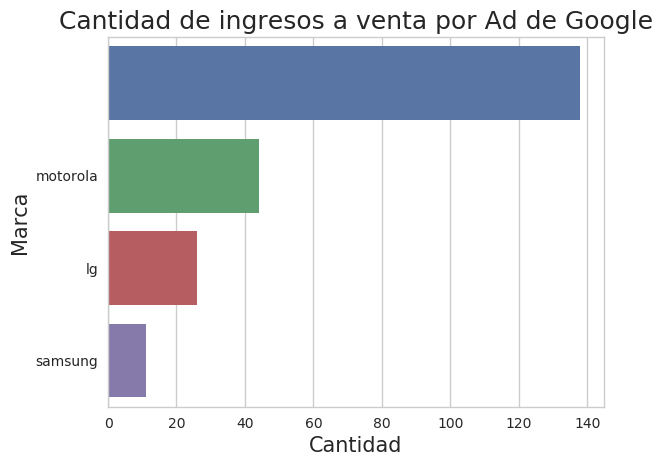

In [101]:
'''
Grafico de barras de la cantidad de ingresos a venta por Ad Campaigns de Google.
'''
ing = dataframe[dataframe['campaign_source'] == 'google']
ingresosVentaPorAdDeGoogle = ing['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'vender' and len(str(url).split('/'))>=3) else None).value_counts()

g = sns.barplot(x=ingresosVentaPorAdDeGoogle.values, y=ingresosVentaPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a venta por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [102]:
dataframe.groupby('new_vs_returning')['event'].value_counts()

new_vs_returning  event       
New               visited site    26898
Returning         visited site    60480
Name: event, dtype: int64

# 5. Clasificacion de celulares por apariencia

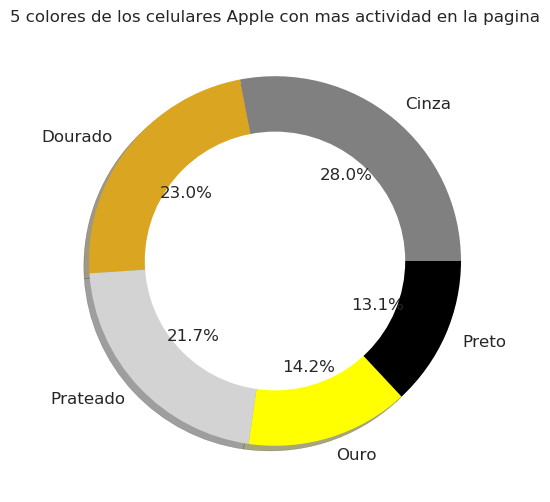

In [129]:
'''
Devuelven listas con los colores mas comprados por marca.
'''

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Samsung'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresSamsung = dataframe['color general'].value_counts().head(5)

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Apple'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresApple = dataframe['color general'].value_counts().head(5)

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Motorola'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresMotorola = dataframe['color general'].value_counts().head(5)

g1 = top5ColoresApple.plot(kind='pie',colors=['grey','goldenrod','lightgrey','yellow','black'],labels=top5ColoresApple.index,shadow=True,autopct='%1.1f%%',figsize=(6,6),fontsize=12)
plt.title('5 colores de los celulares Apple con mas actividad en la pagina')
g1.set_ylabel("")
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

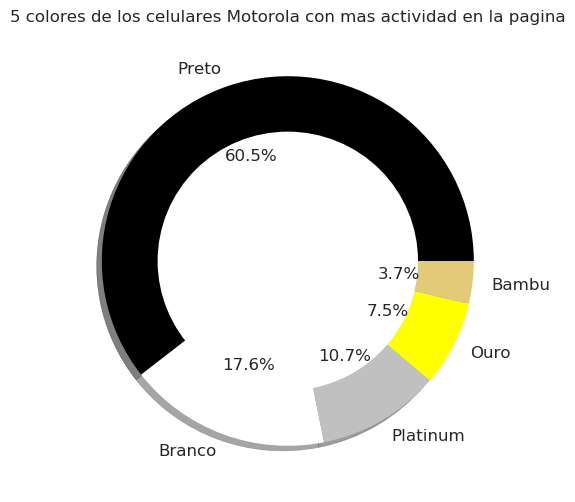

In [130]:
g1 = top5ColoresMotorola.plot(kind='pie',colors=['black','white','silver','yellow','xkcd:sand'],labels=top5ColoresMotorola.index,shadow=True,autopct='%1.1f%%',figsize=(6,6),fontsize=12)
plt.title('5 colores de los celulares Motorola con mas actividad en la pagina')
g1.set_ylabel("")
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

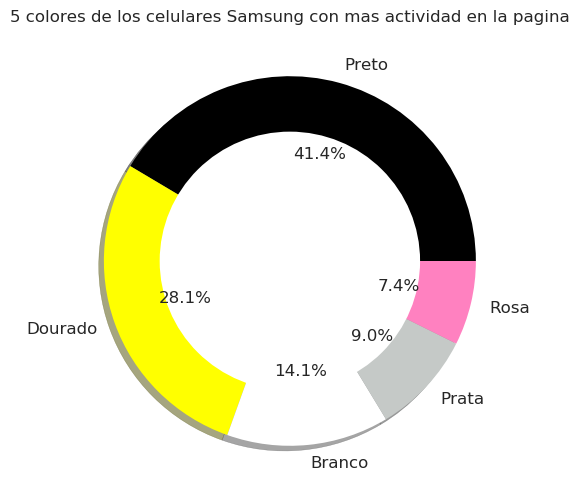

In [131]:
g1 = top5ColoresSamsung.plot(kind='pie',colors=['black','yellow','white','xkcd:silver','xkcd:pink'],labels=top5ColoresSamsung.index,shadow=True,autopct='%1.1f%%',figsize=(6,6),fontsize=12)
plt.title('5 colores de los celulares Samsung con mas actividad en la pagina')
g1.set_ylabel("")
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [106]:
#color mas vendido
coloresVendidos=dataframe[dataframe['event']=='conversion'].loc[:,'color'].value_counts()
coloresVendidos

Preto              368
Dourado            269
Branco             216
Cinza espacial      89
Prateado            51
Ouro Rosa           32
Rosa                30
Cinza               23
Azul                22
Preto Vermelho      11
Prata                8
Platinum             7
Preto Matte          6
Branco Vermelho      6
Verde                5
Ouro                 4
Titânio              4
Ametista             4
Preto Brilhante      3
Indigo               3
Vermelho             2
Bambu                2
Cabernet             2
Amarelo              2
Azul Topázio         1
Preto Azul           1
Couro Vintage        1
Name: color, dtype: int64

In [132]:
color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Samsung')&(dataframe['event']=='conversion'),:]
color_preto_sam=len(color_preto)
color_preto_sam

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Motorola')&(dataframe['event']=='conversion'),:]
color_preto_moto=len(color_preto)
color_preto_moto

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Apple')&(dataframe['event']=='conversion'),:]
color_preto_app=len(color_preto)
color_preto_app

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] != 'Apple')& (dataframe['marca'] != 'Samsung')&(dataframe['marca'] != 'Motorola')&(dataframe['event']=='conversion'),:]
color_preto_others=len(color_preto)
color_preto_others

cantidadPorModelo=[color_preto_app,color_preto_moto,color_preto_sam,color_preto_others]
cantidadPorModeloIndex=['Apple','Motorola','Samsung','Otros']

Text(0,0.5,'Cantidad')

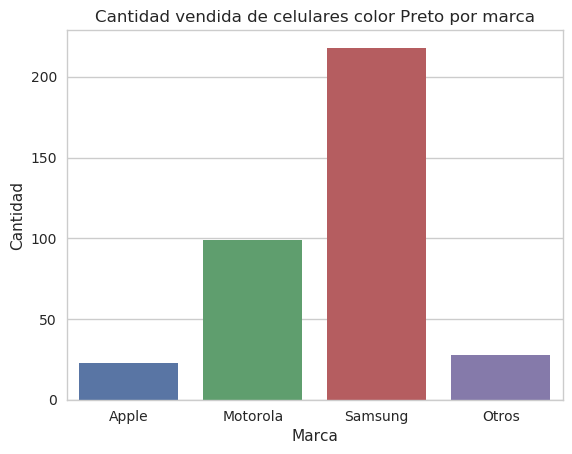

In [108]:
g=sns.barplot(x=cantidadPorModeloIndex,y=cantidadPorModelo)
g.set_title('Cantidad vendida de celulares color Preto por marca')
g.set_xlabel('Marca')
g.set_ylabel('Cantidad')

Text(0.5,1,'Cantidad de conversiones con respecto a la condicion del producto')

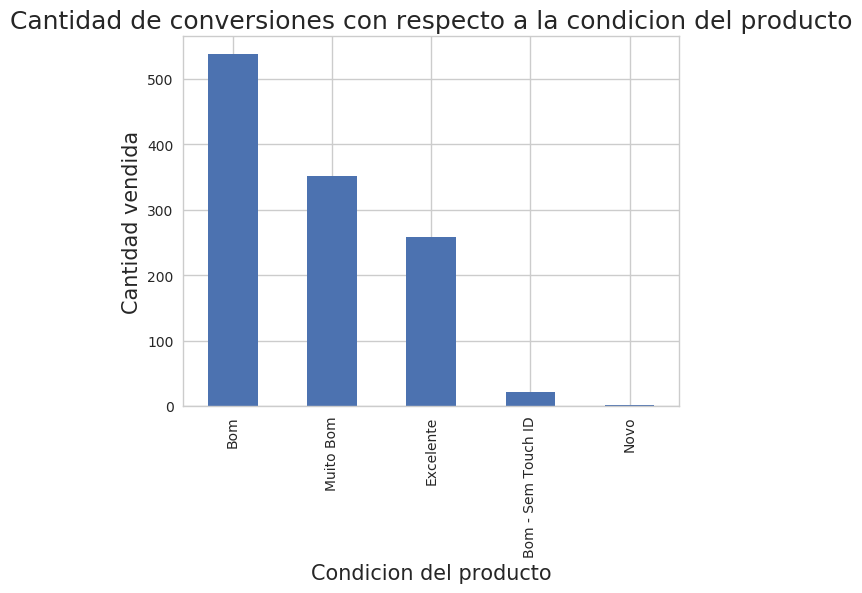

In [109]:
conversiones=dataframe[dataframe['event'] == 'conversion']
condicionDeConversiones=conversiones['condition'].value_counts()
g=condicionDeConversiones.plot.bar()
g.set_xlabel('Condicion del producto',fontsize=15)
g.set_ylabel('Cantidad vendida',fontsize=15)
g.set_title('Cantidad de conversiones con respecto a la condicion del producto', fontsize=18)

In [110]:
#Estudio de ventas con respecto a la condicion del producto
conversiones=dataframe[dataframe['event'] == 'conversion']
condition_per_brand=conversiones.groupby(['marca','condition']).count()
conv=condition_per_brand['event'].to_frame()
conv.columns=['cantidad de conversiones']
conv

cantidad de conversiones
marca    condition                                   
Apple    Bom                                      132
         Bom - Sem Touch ID                        22
         Excelente                                 77
         Muito Bom                                 92
Asus     Bom                                        1
         Excelente                                  1
LG       Bom                                       10
         Excelente                                  6
         Muito Bom                                  4
Lenovo   Bom                                        8
         Excelente                                  6
Motorola Bom                                       61
         Excelente                                 39
         Muito Bom                                 49
Samsung  Bom                                      324
         Excelente                                126
         Muito Bom                                189
         Novo                                       2
Sony     Bom                                        2
         Excelente                                  3
         Muito Bom                                 18

In [111]:
#Reseteo el indice para trabajar mas facil y poder hacer un stack bar plot
conv.reset_index(inplace=True)
conv

,marca,condition,cantidad de conversiones
0,Apple,Bom,132
1,Apple,Bom - Sem Touch ID,22
2,Apple,Excelente,77
3,Apple,Muito Bom,92
4,Asus,Bom,1
5,Asus,Excelente,1
6,LG,Bom,10
7,LG,Excelente,6
8,LG,Muito Bom,4
9,Lenovo,Bom,8


In [112]:
conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'), :]

,marca,condition,cantidad de conversiones
0,Apple,Bom,132
2,Apple,Excelente,77
3,Apple,Muito Bom,92


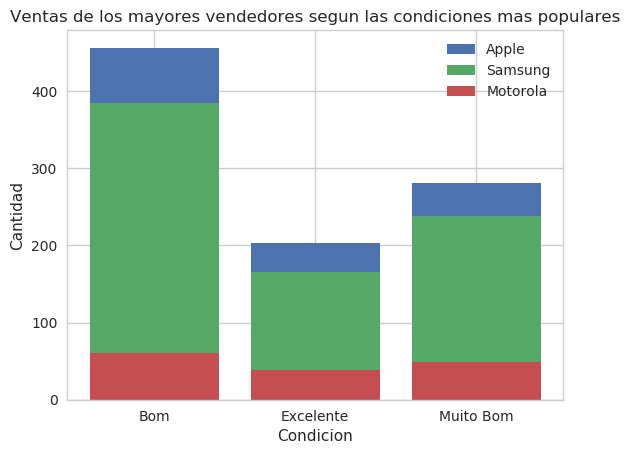

In [113]:
appleVentas=conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'),'cantidad de conversiones'].values
samsungVentas=conv.loc[(conv['marca']=='Samsung') & (conv['condition']!='Novo'),'cantidad de conversiones'].values
motorolaVentas=conv.loc[conv['marca']=='Motorola','cantidad de conversiones'].values

g1=plt.bar(x=conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'), 'condition'],height=appleVentas, bottom=samsungVentas)
g2=plt.bar(x=conv.loc[(conv['marca']=='Samsung') & (conv['condition']!='Novo'),'condition'],height=samsungVentas,bottom=motorolaVentas)
g3=plt.bar(x=conv.loc[conv['marca']=='Motorola','condition'],height=motorolaVentas)


plt.title('Ventas de los mayores vendedores segun las condiciones mas populares')
plt.xlabel('Condicion')
plt.ylabel('Cantidad')
plt.legend((g1[0],g2[0],g3[0]),('Apple','Samsung','Motorola'))

plt.show()

# 6. Datos por sku

In [114]:
#Estudio del dataframe de acuerdo al identificador unico de cada producto
conv_sku=conversiones.groupby('sku').count()
conv_sku=conv_sku.sort_values('event',ascending=False).loc[:,'event'].to_frame()
conv_sku.columns=['cantidad de conversiones']
conv_sku.head(15)

,cantidad de conversiones
sku,
6371.0,30
6370.0,18
7631.0,17
2692.0,16
3371.0,14
2711.0,12
6343.0,12
283.0,11
6357.0,11


In [115]:
#Producto mas visto por los usuarios
dataframe[dataframe['event']=='viewed product'].loc[:,'sku'].value_counts()

2830.0     4007
2829.0     3466
2831.0     3423
8443.0     3265
12758.0    2714
2833.0     2685
9930.0     2415
5907.0     2404
3371.0     2343
2692.0     2235
8485.0     2161
8513.0     2157
6371.0     2136
6357.0     2075
6581.0     2072
2832.0     2050
1309.0     2047
12730.0    2031
12744.0    2029
8471.0     1999
6023.0     1968
1310.0     1968
283.0      1966
8541.0     1949
8555.0     1915
3359.0     1828
8527.0     1823
284.0      1813
2691.0     1805
12760.0    1782
           ... 
11918         1
4235.0        1
11611.0       1
12872.0       1
7125          1
12142.0       1
12941.0       1
3864          1
1075          1
12634         1
2783          1
3000          1
14734         1
6439          1
9512          1
12886.0       1
1101.0        1
2715          1
2857.0        1
10618         1
17694         1
249           1
10044         1
10603         1
13262         1
11583.0       1
13123         1
11064.0       1
4153          1
7336          1
Name: sku, Length: 3568,

In [116]:
dataframe[dataframe['event']=='lead']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,marca,modelo,año,mes,dia,actividad,compra,checkout,pais,color general
3248,2018-04-17 22:11:19,lead,01139919,NaN,NaN,Samsung Galaxy On 7,NaN,NaN,NaN,NaN,...,Samsung,Galaxy On 7,2018,04,17,1,False,False,NaN,NaN
6636,2018-04-07 11:37:11,lead,01bca043,NaN,NaN,iPhone 6 Plus,NaN,NaN,NaN,NaN,...,Apple,6 Plus,2018,04,07,1,False,False,NaN,NaN
7036,2018-02-12 17:23:30,lead,01db2fe6,NaN,NaN,Samsung Galaxy J5,NaN,NaN,NaN,NaN,...,Samsung,Galaxy J5,2018,02,12,1,False,False,NaN,NaN
13041,2018-03-08 12:39:30,lead,03767f8e,NaN,NaN,iPhone 6,NaN,NaN,NaN,NaN,...,Apple,6,2018,03,08,1,False,False,NaN,NaN
14203,2018-01-08 14:04:07,lead,03bdcd81,NaN,NaN,Samsung Galaxy S7 Edge,NaN,NaN,NaN,NaN,...,Samsung,Galaxy S7 Edge,2018,01,08,1,False,False,NaN,NaN
14523,2018-05-20 22:00:27,lead,03d11a48,NaN,NaN,Samsung Galaxy S7 Edge,NaN,NaN,NaN,NaN,...,Samsung,Galaxy S7 Edge,2018,05,20,1,False,False,NaN,NaN
19432,2018-04-17 16:40:49,lead,053e3907,NaN,NaN,iPhone 6 Plus,NaN,NaN,NaN,NaN,...,Apple,6 Plus,2018,04,17,1,False,False,NaN,NaN
19752,2018-04-11 21:30:54,lead,055142e0,NaN,NaN,Samsung Galaxy On 7,NaN,NaN,NaN,NaN,...,Samsung,Galaxy On 7,2018,04,11,1,False,False,NaN,NaN
19898,2018-04-13 21:07:01,lead,055142e0,NaN,NaN,Samsung Galaxy On 7,NaN,NaN,NaN,NaN,...,Samsung,Galaxy On 7,2018,04,13,1,False,False,NaN,NaN
29375,2018-05-16 00:42:33,lead,07cd981f,NaN,NaN,iPhone 6S,NaN,NaN,NaN,NaN,...,Apple,6S,2018,05,16,1,False,False,NaN,NaN
